In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [19]:
torch.manual_seed(42)

def generate_xor_data(n_samples):
    X = np.random.rand(n_samples, 2) * 2 - 1  
    y = (X[:, 0] * X[:, 1] > 0).astype(int)  
    return X, y

# Create the dataset
X, y = generate_xor_data(400)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [22]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


def calculate_accuracy(model, X, y):
    model.eval()  
    with torch.no_grad():
        output = model(X)
        predicted = (output >= 0.5).float() 
        accuracy = (predicted == y).sum().item() / y.size(0)
    return accuracy

def train_model(model, X_train, y_train, X_test, y_test, reg_type=None, reg_coeff=0.0, epochs=1000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()  
        optimizer.zero_grad()

        output = model(X_train)
        loss = criterion(output, y_train)
        
        if reg_type == 'L1':
            l1_reg = reg_coeff * sum(p.abs().sum() for p in model.parameters())
            loss += l1_reg
        elif reg_type == 'L2':
            l2_reg = reg_coeff * sum(p.pow(2).sum() for p in model.parameters())
            loss += l2_reg

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            train_acc = calculate_accuracy(model, X_train, y_train)
            test_acc = calculate_accuracy(model, X_test, y_test)
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

    final_train_acc = calculate_accuracy(model, X_train, y_train)
    final_test_acc = calculate_accuracy(model, X_test, y_test)
    print(f'Final Train Accuracy: {final_train_acc:.4f}, Final Test Accuracy: {final_test_acc:.4f}')
    
    return model

In [26]:
mlp = MLP(2, 10, 1)
train_model(mlp, X_train_tensor, y_train_tensor,X_test_tensor, y_test_tensor)

Epoch [0/1000], Loss: 0.6958, Train Acc: 0.5500, Test Acc: 0.5900
Epoch [100/1000], Loss: 0.0827, Train Acc: 0.9950, Test Acc: 0.9800
Epoch [200/1000], Loss: 0.0269, Train Acc: 1.0000, Test Acc: 0.9750
Epoch [300/1000], Loss: 0.0136, Train Acc: 1.0000, Test Acc: 0.9700
Epoch [400/1000], Loss: 0.0079, Train Acc: 1.0000, Test Acc: 0.9650
Epoch [500/1000], Loss: 0.0050, Train Acc: 1.0000, Test Acc: 0.9650
Epoch [600/1000], Loss: 0.0033, Train Acc: 1.0000, Test Acc: 0.9650
Epoch [700/1000], Loss: 0.0023, Train Acc: 1.0000, Test Acc: 0.9600
Epoch [800/1000], Loss: 0.0017, Train Acc: 1.0000, Test Acc: 0.9600
Epoch [900/1000], Loss: 0.0013, Train Acc: 1.0000, Test Acc: 0.9600
Final Train Accuracy: 1.0000, Final Test Accuracy: 0.9600


MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [25]:
mlp_l1 = MLP(2, 10, 1)
train_model(mlp_l1, X_train_tensor, y_train_tensor,X_test_tensor, y_test_tensor, reg_type='L1', reg_coeff=0.001)

Epoch [0/1000], Loss: 0.7495, Train Acc: 0.4900, Test Acc: 0.4700
Epoch [100/1000], Loss: 0.1527, Train Acc: 0.9950, Test Acc: 0.9700
Epoch [200/1000], Loss: 0.1089, Train Acc: 1.0000, Test Acc: 0.9850
Epoch [300/1000], Loss: 0.0965, Train Acc: 1.0000, Test Acc: 0.9900
Epoch [400/1000], Loss: 0.0865, Train Acc: 1.0000, Test Acc: 0.9850
Epoch [500/1000], Loss: 0.0793, Train Acc: 1.0000, Test Acc: 0.9900
Epoch [600/1000], Loss: 0.0752, Train Acc: 1.0000, Test Acc: 0.9900
Epoch [700/1000], Loss: 0.0709, Train Acc: 1.0000, Test Acc: 0.9900
Epoch [800/1000], Loss: 0.0670, Train Acc: 1.0000, Test Acc: 0.9900
Epoch [900/1000], Loss: 0.0633, Train Acc: 1.0000, Test Acc: 0.9900
Final Train Accuracy: 1.0000, Final Test Accuracy: 0.9900


MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [27]:
mlp_l2 = MLP(2, 10, 1)
train_model(mlp_l2, X_train_tensor, y_train_tensor,X_test_tensor, y_test_tensor, reg_type='L2', reg_coeff=0.01)

Epoch [0/1000], Loss: 0.7713, Train Acc: 0.4950, Test Acc: 0.4900
Epoch [100/1000], Loss: 0.4331, Train Acc: 0.9950, Test Acc: 0.9750
Epoch [200/1000], Loss: 0.4263, Train Acc: 0.9950, Test Acc: 0.9700
Epoch [300/1000], Loss: 0.4262, Train Acc: 0.9950, Test Acc: 0.9700
Epoch [400/1000], Loss: 0.4262, Train Acc: 0.9950, Test Acc: 0.9700
Epoch [500/1000], Loss: 0.4262, Train Acc: 0.9950, Test Acc: 0.9700
Epoch [600/1000], Loss: 0.4262, Train Acc: 0.9950, Test Acc: 0.9700
Epoch [700/1000], Loss: 0.4262, Train Acc: 0.9950, Test Acc: 0.9700
Epoch [800/1000], Loss: 0.4262, Train Acc: 0.9950, Test Acc: 0.9750
Epoch [900/1000], Loss: 0.4262, Train Acc: 0.9950, Test Acc: 0.9750
Final Train Accuracy: 0.9950, Final Test Accuracy: 0.9700


MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [28]:
class LogisticRegressionPoly(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionPoly, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = torch.tensor(poly.fit_transform(X_train), dtype=torch.float32)
X_test_poly = torch.tensor(poly.transform(X_test), dtype=torch.float32)

log_reg_poly = LogisticRegressionPoly(X_train_poly.shape[1])

train_model(log_reg_poly, X_train_poly, y_train_tensor, X_test_poly, y_test_tensor, epochs=1000, lr=0.1)


Epoch [0/1000], Loss: 0.6882, Train Acc: 0.6200, Test Acc: 0.6450
Epoch [100/1000], Loss: 0.2875, Train Acc: 0.9400, Test Acc: 0.9650
Epoch [200/1000], Loss: 0.2233, Train Acc: 0.9650, Test Acc: 0.9800
Epoch [300/1000], Loss: 0.1898, Train Acc: 0.9700, Test Acc: 0.9800
Epoch [400/1000], Loss: 0.1678, Train Acc: 0.9700, Test Acc: 0.9800
Epoch [500/1000], Loss: 0.1516, Train Acc: 0.9750, Test Acc: 0.9800
Epoch [600/1000], Loss: 0.1391, Train Acc: 0.9800, Test Acc: 0.9800
Epoch [700/1000], Loss: 0.1289, Train Acc: 0.9800, Test Acc: 0.9800
Epoch [800/1000], Loss: 0.1205, Train Acc: 0.9800, Test Acc: 0.9800
Epoch [900/1000], Loss: 0.1134, Train Acc: 0.9900, Test Acc: 0.9800
Final Train Accuracy: 0.9950, Final Test Accuracy: 0.9800


LogisticRegressionPoly(
  (linear): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

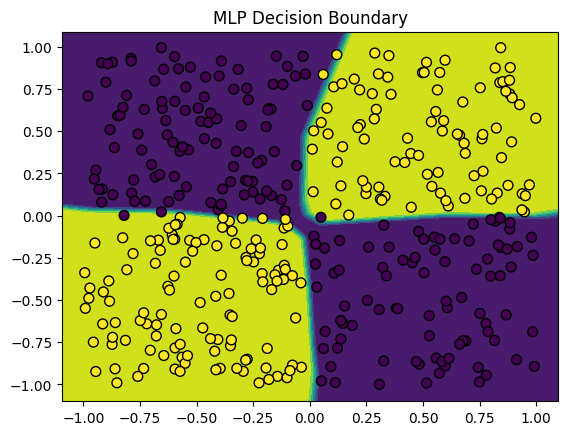

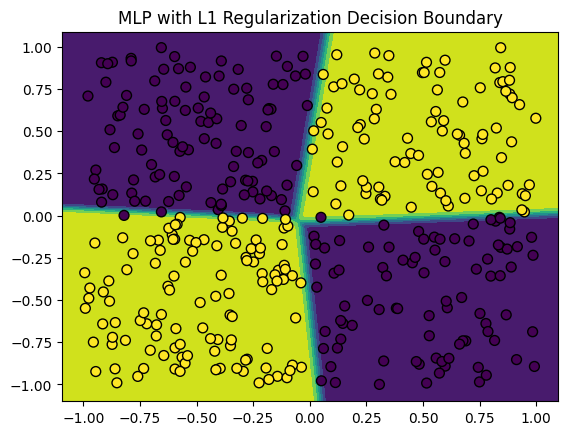

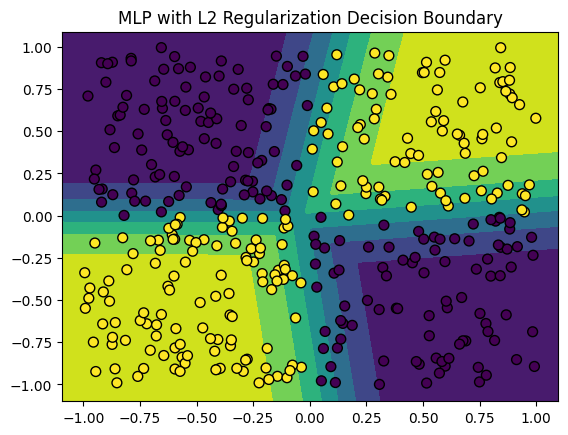

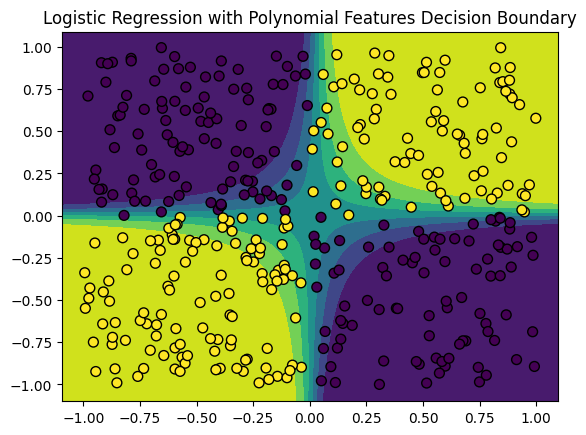

In [29]:
def plot_decision_boundary(model, X, y, title, poly_features=False):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if poly_features:
        grid_poly = torch.tensor(poly.transform(grid), dtype=torch.float32)
        Z = model(grid_poly).detach().numpy()
    else:
        grid_tensor = torch.tensor(grid, dtype=torch.float32)
        Z = model(grid_tensor).detach().numpy()
        
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k',s=50)
    plt.title(title)
    plt.show()

plot_decision_boundary(mlp, X, y, "MLP Decision Boundary")
plot_decision_boundary(mlp_l1, X, y, "MLP with L1 Regularization Decision Boundary")
plot_decision_boundary(mlp_l2, X, y, "MLP with L2 Regularization Decision Boundary")
plot_decision_boundary(log_reg_poly, X, y, "Logistic Regression with Polynomial Features Decision Boundary", poly_features=True)


1. **MLP**:  
   The MLP model was able to effectively learn the non-linear decision boundary of the XOR dataset. Since XOR is not linearly separable, a multi-layer perceptron (MLP) is well-suited to capture the complex interactions between features. The high accuracy on both training and test sets shows that the model generalizes well, and the decision boundary aligns with the expected shape of the XOR function.

2. **MLP with L1 Regularization**:  
   Initially, when using a regularization coefficient of 0.01, the model's accuracy decreased, likely because L1 regularization tends to drive weights toward zero, making the model too sparse. By lowering the coefficient, the model was able to strike a better balance between regularization and learning capacity. This suggests that the MLP model benefits from some degree of sparsity, but too much can hinder its performance on a non-linearly separable dataset like XOR. Once adjusted, the model performs comparably well while maintaining some sparsity in the weights.

3. **MLP with L2 Regularization**:  
   The L2 regularization added a penalty on large weight values, which helped in controlling overfitting. The penalty term smoothly shrinks the weights without making them zero, which allowed the model to capture the non-linear decision boundary of XOR. The regularization coefficient led to a good trade-off between generalization and model complexity, as seen by the high accuracy and appropriate decision boundary.

4. **Logistic Regression with Additional Features**:  
   Since logistic regression is inherently linear, additional features such as \(x_1 \times x_2\), \(x_1^2\), and \(x_2^2\) were crucial for capturing the non-linearity in XOR. With these additional features, the logistic regression model was able to fit a more complex decision boundary.It still achieved high accuracy and captured the XOR pattern.
   
Overall, all models perform well and demonstrate the importance of selecting the right regularization and feature transformations based on the complexity of the problem.